# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [2]:
library(igraph)
library(dplyr)

In [3]:
### dataset of airport . we are interested in the AER and the KZN, from where the flite went out to where. 
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

X2B X410 AER X2965 KZN X2990 X X0 CR2
1 2B  410  ASF 2966  KZN 2990    0  CR2
2 2B  410  ASF 2966  MRV 2962    0  CR2
3 2B  410  CEK 2968  KZN 2990    0  CR2
4 2B  410  CEK 2968  OVB 4078    0  CR2
5 2B  410  DME 4029  KZN 2990    0  CR2
6 2B  410  DME 4029  NBC 6969    0  CR2

In [4]:
### companies flight counts. here we want to count the flites in each company of flite
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B n   
1  FR  2484
2  AA  2354
3  UA  2180
4  DL  1981
5  US  1960
6  CZ  1454
7  MU  1263
8  CA  1260
9  WN  1146
10 U2  1130
11 AF  1071
12 LH   923
13 AZ   877
14 IB   831
15 KL   830
16 ZH   815
17 AB   798
18 FL   726
19 AC   705
20 TK   658

In [54]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="TK") %>% tally()

n  
1 658

In [56]:
df2 <- df %>% filter(X2B=="TK") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

head(df2)

AER KZN cnt
1 AAL BLL 1  
2 AAL IST 1  
3 ABJ IST 1  
4 ACC ABJ 1  
5 ACC IST 1  
6 ADA ESB 1

In [57]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

in order to do all the connections between all the airport we do matrix 

In [58]:
#the matrix is 9 on 9 which are all the location that the "2L" is flite to and from . conecctions between airport
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}


In [59]:
links <- as.matrix(mtx)


In [60]:
# there are 2 types of connections: direct-the directions are important and undirect. the mynet is the graph object
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [61]:
### network size by edges
E(mynet)

+ 658/658 edges from 7a453fe:
 [1]  1-> 39  1->117  2->117  3->  2  3->117  4-> 83  4->117  4->212  5-> 83
[10]  5->101  5->117  5->212  6-> 65  6->106  6->117  6->124  6->220  7->117
[19]  8-> 83  8->117  9->117 10->117 11-> 83 11->117 12-> 38 13->117 14->117
[28] 15->117 16->117 16->212 17-> 44 18->117 19->117 20->117 21->212 22->117
[37] 22->212 23->117 24->256 25->117 26-> 34 26-> 77 26-> 83 26->101 26->117
[46] 26->212 26->250 27->117 27->161 28-> 83 28->117 29->117 30->117 31->117
[55] 32->117 33-> 83 33->117 34-> 26 34-> 83 34->117 35->117 36->117 36->213
[64] 37-> 83 37->117 37->212 38-> 12 38-> 41 38->105 38->117 38->139 38->163
[73] 38->203 38->214 38->225 39->  1 39->117 40->117 41-> 38 42->117 43->117
[82] 44-> 17 44->117 44->212 45->117 46->117 47->117 48->117 49->117 49->124
+ ... omitted several edges

In [62]:
### network size by vertices (nodes)
V(mynet)

+ 259/259 vertices, from 7a453fe:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
+ ... omitted several vertices

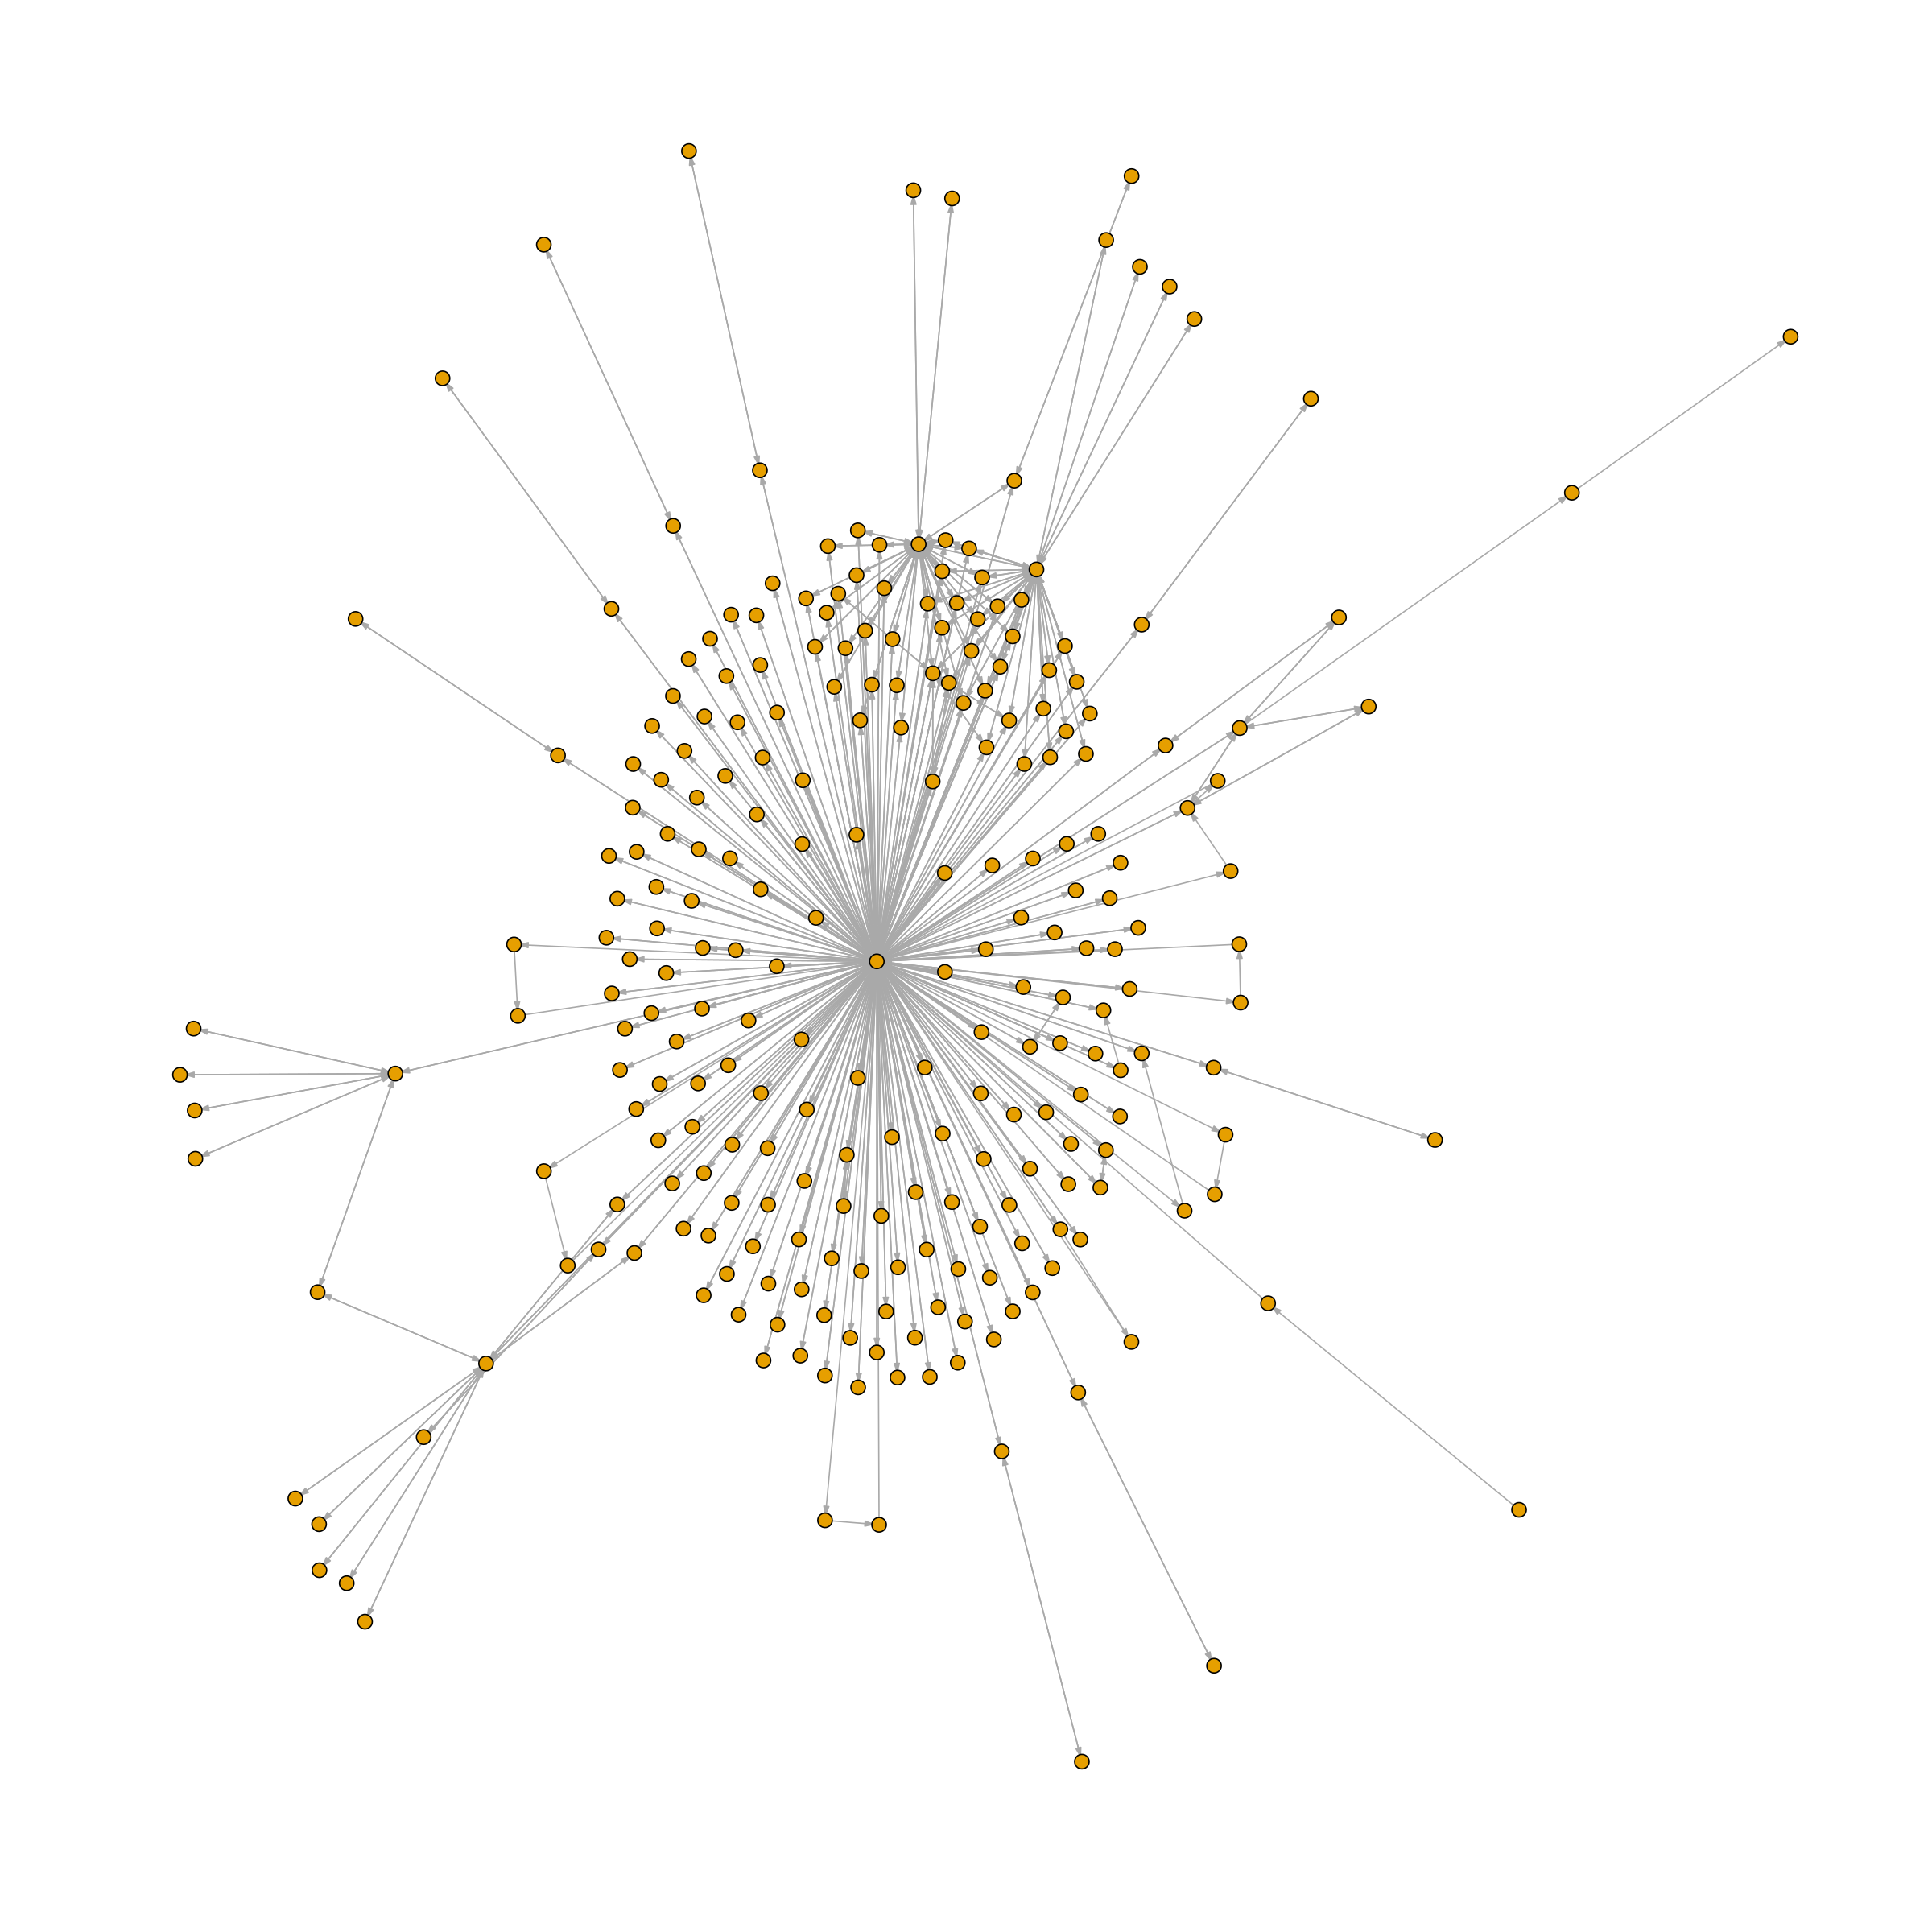

In [63]:
options(repr.plot.width = 20, repr.plot.height =20)

plot(mynet, vertex.size=1.7, edge.arrow.size=.1, vertex.label=NA)

### Measures

In [64]:
mean_distance(mynet, directed=F)

[1] 2.244411

In [65]:
# the ,maximum distane
diameter(mynet, directed=F,weights=NA)

[1] 6

In [66]:
centr_degree(mynet,mode="in",normalized=T)

$res
  [1]   2   1   1   3   4   4   1   2   1   1   2   1   1   1   1   2   1   1
 [19]   1   1   1   2   1   1   1   7   2   2   1   1   1   1   2   3   1   2
 [37]   3   9   2   1   1   1   1   3   1   1   1   1   2   1   2   1   1   1
 [55]   1   1   1   1   1   1   1   1   3   1   4   1   1   1   1   1   1   1
 [73]   2   1   1   1   2   3   1   1   2   3  34   1   3   1   1   1   3   2
 [91]   1   2   1   1   2   1   1   1   3   1   3   1   1   1   2   1   1   3
[109]   1   2   6   1   2   2   1   1 219   1   1   1   2   2   1   2   1   1
[127]   2   2   1   1   1   1   1   1   1   1   3   1   2   2   2   2   1   1
[145]   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   2   1
[163]   1   1   1   2   2   2   3   1   1   1   2   1   2   2   1   1   1   1
[181]   1   1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1   1
[199]   1   1   1   1   1   1   1   1   1   1   1   1   1  36   1   1   2   2
[217]   1   1   1   2   1   1   1   1   2   1   1   1   2   1   1   1   1   1
[235]   1   2   1   2   1   1   2   1   3   1   1   3   2   1   3   3   1   2
[253]   1   1   1   2   1   1   1

$centralization
[1] 0.8389902

$theoretical_max
[1] 66822

In [67]:
edge_density(mynet,loops=F)

[1] 0.009847056

In [68]:
degree(mynet)

[1]   4   2   3   6   8   9   2   4   2   2   4   2   2   2   2   4   2   2
 [19]   2   2   2   4   2   2   2  14   4   4   2   2   2   2   4   6   2   4
 [37]   6  18   4   2   2   2   2   6   2   2   2   2   4   2   4   2   2   2
 [55]   2   2   2   2   2   2   2   2   6   2   8   2   2   2   2   2   2   2
 [73]   4   2   2   2   4   6   2   2   4   6  68   2   6   2   2   2   6   4
 [91]   2   4   2   2   4   2   2   2   6   2   6   2   2   2   4   2   2   6
[109]   2   4  12   2   4   4   2   2 437   2   2   2   4   4   2   4   2   2
[127]   4   4   2   2   2   2   2   2   2   2   6   2   4   3   4   4   2   2
[145]   2   2   2   2   4   2   2   2   2   2   2   2   2   2   2   2   4   2
[163]   2   2   2   4   4   4   6   2   2   2   4   2   4   4   2   2   2   2
[181]   2   2   2   2   2   2   2   1   2   2   2   2   2   2   2   2   2   2
[199]   2   2   2   2   2   2   2   2   2   2   2   2   2  72   2   2   4   4
[217]   2   2   2   4   2   2   2   2   4   2   2   2   4   2   2   2   2   2
[235]   3   4   2   4   2   2   3   2   6   2   2   6   4   2   6   6   2   4
[253]   2   2   2   4   2   2   1

In [69]:
mean(degree(mynet))

[1] 5.081081

### Clusters

In [70]:
cliques(mynet)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[[1]]
+ 1/259 vertex, from 7a453fe:
[1] 117

[[2]]
+ 1/259 vertex, from 7a453fe:
[1] 212

[[3]]
+ 1/259 vertex, from 7a453fe:
[1] 225

[[4]]
+ 1/259 vertex, from 7a453fe:
[1] 220

[[5]]
+ 1/259 vertex, from 7a453fe:
[1] 124

[[6]]
+ 1/259 vertex, from 7a453fe:
[1] 106

[[7]]
+ 1/259 vertex, from 7a453fe:
[1] 253

[[8]]
+ 1/259 vertex, from 7a453fe:
[1] 245

[[9]]
+ 1/259 vertex, from 7a453fe:
[1] 231

[[10]]
+ 1/259 vertex, from 7a453fe:
[1] 214

[[11]]
+ 1/259 vertex, from 7a453fe:
[1] 213

[[12]]
+ 1/259 vertex, from 7a453fe:
[1] 203

[[13]]
+ 1/259 vertex, from 7a453fe:
[1] 188

[[14]]
+ 1/259 vertex, from 7a453fe:
[1] 185

[[15]]
+ 1/259 vertex, from 7a453fe:
[1] 174

[[16]]
+ 1/259 vertex, from 7a453fe:
[1] 164

[[17]]
+ 1/259 vertex, from 7a453fe:
[1] 163

[[18]]
+ 1/259 vertex, from 7a453fe:
[1] 129

[[19]]
+ 1/259 vertex, from 7a453fe:
[1] 104

[[20]]
+ 1/259 vertex, from 7a453fe:
[1] 98

[[21]]
+ 1/259 vertex, from 7a453fe:
[1] 91

[[22]]
+ 1/259 vertex, from 7a453fe:
[1] 84



In [71]:
#Here we dont have many cliques
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 [38] 1 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 [75] 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2
[112] 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 2 1 2 1 2
[149] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
[186] 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 2 1 2 1 2 1 2 1 2 2 1 2 2 1 2 1 2 1 2 1 2
[223] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 2 1 2
[260] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1
[297] 2 1 2 2 2 2 2 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 2 1 2
[334] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1
[371] 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2
[408] 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2
[445] 1 2 1 2 3 2 3 2 3 3 2 2 1 2 3 3 2 2 1 2 3 3 2 2 1 2 3 3 2 2 1 2 3 2 1 2 3
[482] 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 3 2 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2
[519] 3 3 2 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 3 2 2 1 2 3 2 1 2 3 3 2 2 1
[556] 2 3 2 1 2 3 3 2 2 1 2 3 3 2 2 1 2 3 3 2 2 1 2 3 2 1 2 3 3 2 2 1 2 3 2 1 2
[593] 3 3 2 2 1 2 3 3 2 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3
[630] 3 2 2 2 2 1 2 3 2 3 3 2 2 1 2 3 3 2 2 1 2 3 2 1 2 3 2 1 2 3 4 3 2 3 2 1 2
[667] 3 4 3 2 3 2

In [72]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
“At cliques.c:1087 :directionality of edges is ignored for directed graphs”


[[1]]
+ 4/259 vertices, from 7a453fe:
[1] 117  83  26 250

[[2]]
+ 4/259 vertices, from 7a453fe:
[1] 117  83  26  34


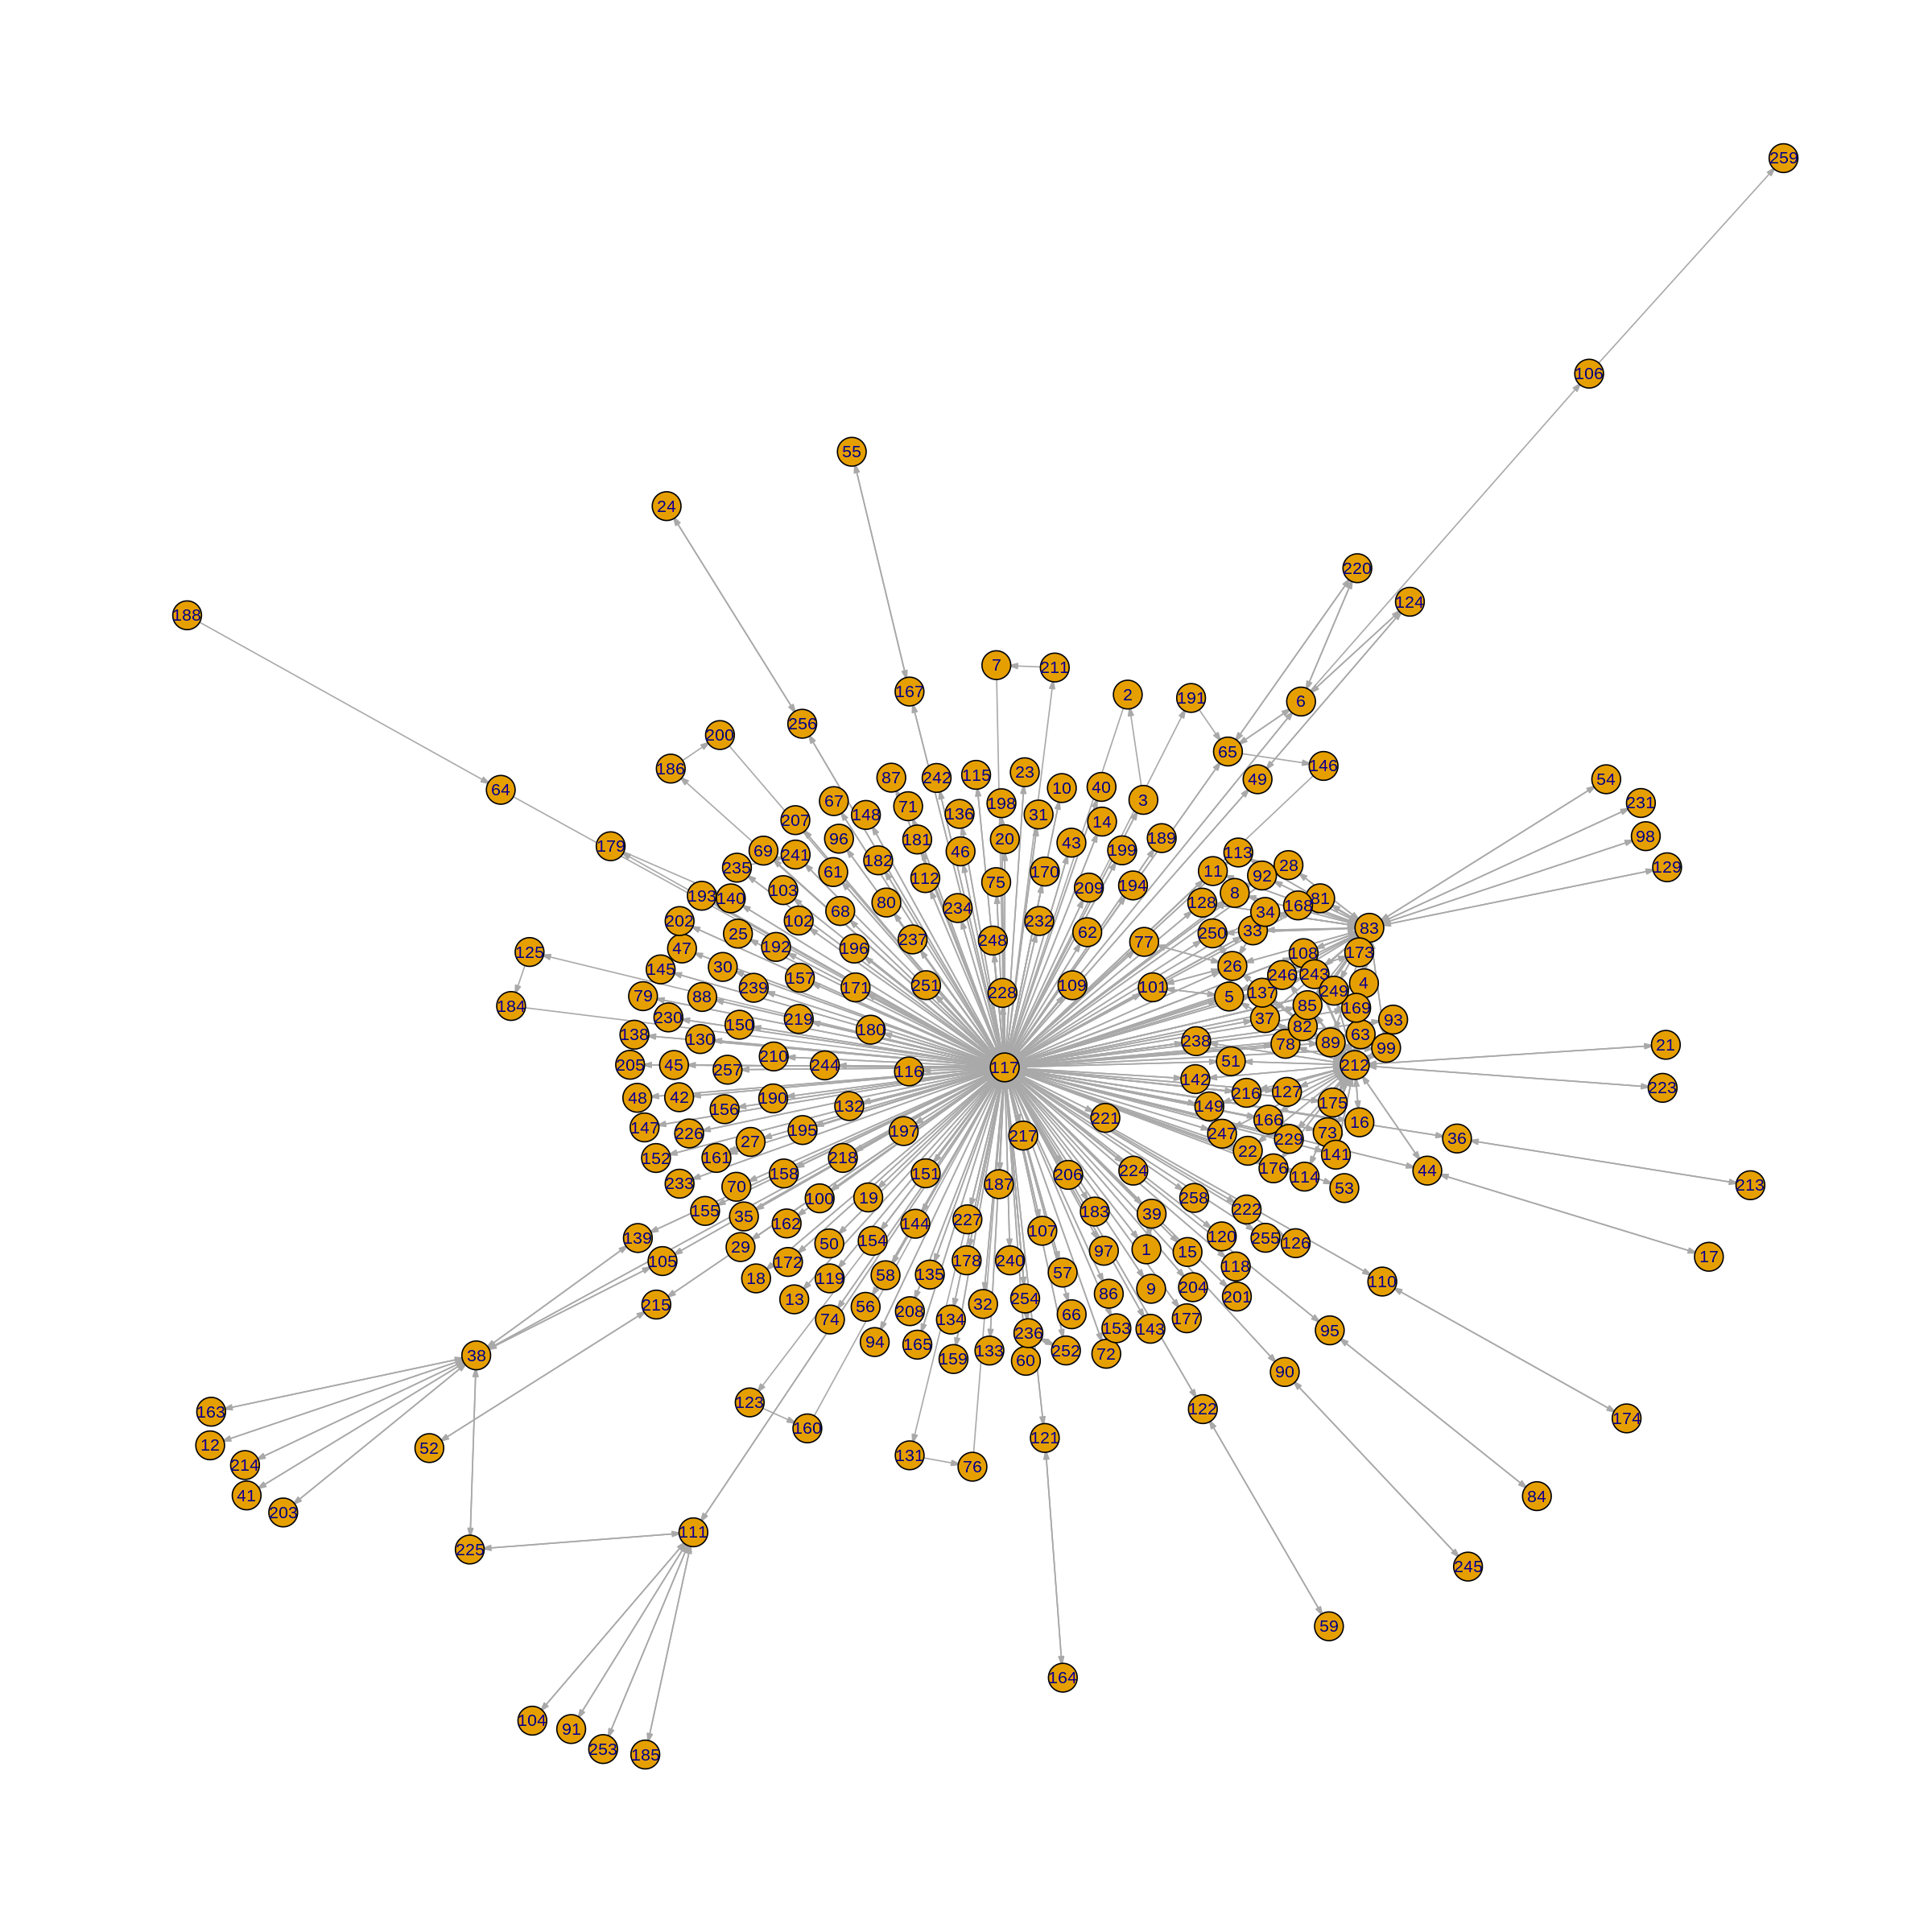

In [73]:
plot(as.directed(mynet),vertex.size=3.5, edge.arrow.size=.1)

### Hubs

[1] 0.074113445 0.069580459 0.069875348 0.100346786 0.105526629 0.075751079
  [7] 0.069580459 0.086269948 0.069580459 0.069580459 0.086269948 0.004994405
 [13] 0.069580459 0.069580459 0.069580459 0.083657297 0.005107617 0.069580459
 [19] 0.069580459 0.069580459 0.014076838 0.083657297 0.069580459 0.004238097
 [25] 0.069580459 0.121862593 0.074113445 0.086269948 0.069580459 0.069580459
 [31] 0.069580459 0.069580459 0.086269948 0.093893841 0.069580459 0.069875348
 [37] 0.100346786 0.081059021 0.074113445 0.069580459 0.004994405 0.069580459
 [43] 0.069580459 0.084011845 0.069580459 0.069580459 0.069580459 0.069580459
 [49] 0.070196388 0.069580459 0.083657297 0.004238097 0.069580459 0.016689489
 [55] 0.004238097 0.069580459 0.069580459 0.069580459 0.004238097 0.069580459
 [61] 0.069580459 0.069580459 0.100346786 0.069580459 0.075148094 0.069580459
 [67] 0.069580459 0.069580459 0.069580459 0.069580459 0.069580459 0.069580459
 [73] 0.083657297 0.069580459 0.069580459 0.069580459 0.077204353 0.100346786
 [79] 0.069580459 0.069580459 0.086269948 0.100346786 0.252649808 0.004238097
 [85] 0.100346786 0.069580459 0.069580459 0.069580459 0.100346786 0.069875348
 [91] 0.004332714 0.086269948 0.069580459 0.069580459 0.069875348 0.069580459
 [97] 0.069580459 0.016689489 0.100346786 0.069580459 0.083709923 0.069580459
[103] 0.069580459 0.004332714 0.074574864 0.000000000 0.069580459 0.100346786
[109] 0.069580459 0.069875348 0.071429789 0.069580459 0.086269948 0.083657297
[115] 0.069580459 0.069580459 1.000000000 0.069580459 0.069580459 0.069580459
[121] 0.069875348 0.069875348 0.000000000 0.008871318 0.000000000 0.069580459
[127] 0.083657297 0.086269948 0.016689489 0.069580459 0.000000000 0.069580459
[133] 0.069580459 0.069580459 0.069580459 0.069580459 0.100346786 0.069580459
[139] 0.074574864 0.069580459 0.083657297 0.083657297 0.069580459 0.069580459
[145] 0.069580459 0.069580459 0.069580459 0.069580459 0.083657297 0.069580459
[151] 0.069580459 0.069580459 0.069580459 0.069580459 0.069580459 0.069580459
[157] 0.069580459 0.069580459 0.069580459 0.069580459 0.074113445 0.069580459
[163] 0.004994405 0.004238097 0.069580459 0.083657297 0.069875348 0.086269948
[169] 0.100346786 0.069580459 0.069580459 0.069580459 0.086269948 0.004238097
[175] 0.083657297 0.083657297 0.069580459 0.069580459 0.004238097 0.069580459
[181] 0.069580459 0.069580459 0.069580459 0.069580459 0.004332714 0.000000000
[187] 0.069580459 0.000000000 0.069580459 0.069580459 0.004598179 0.069580459
[193] 0.069580459 0.069580459 0.069580459 0.069580459 0.069580459 0.069580459
[199] 0.069580459 0.069580459 0.069580459 0.069580459 0.004994405 0.069580459
[205] 0.069580459 0.069580459 0.069580459 0.069580459 0.069580459 0.069580459
[211] 0.000000000 0.205167420 0.004238097 0.004994405 0.069875348 0.083657297
[217] 0.069580459 0.069580459 0.069580459 0.009211846 0.069580459 0.069580459
[223] 0.014076838 0.069580459 0.009327119 0.069580459 0.069580459 0.069580459
[229] 0.083657297 0.069580459 0.016689489 0.069580459 0.069580459 0.069580459
[235] 0.074113445 0.074113445 0.069580459 0.083657297 0.069580459 0.069580459
[241] 0.069580459 0.069580459 0.100346786 0.069580459 0.004238097 0.100346786
[247] 0.083657297 0.069580459 0.100346786 0.093893841 0.069580459 0.074113445
[253] 0.004332714 0.069580459 0.069580459 0.069875348 0.069580459 0.069580459
[259] 0.000000000

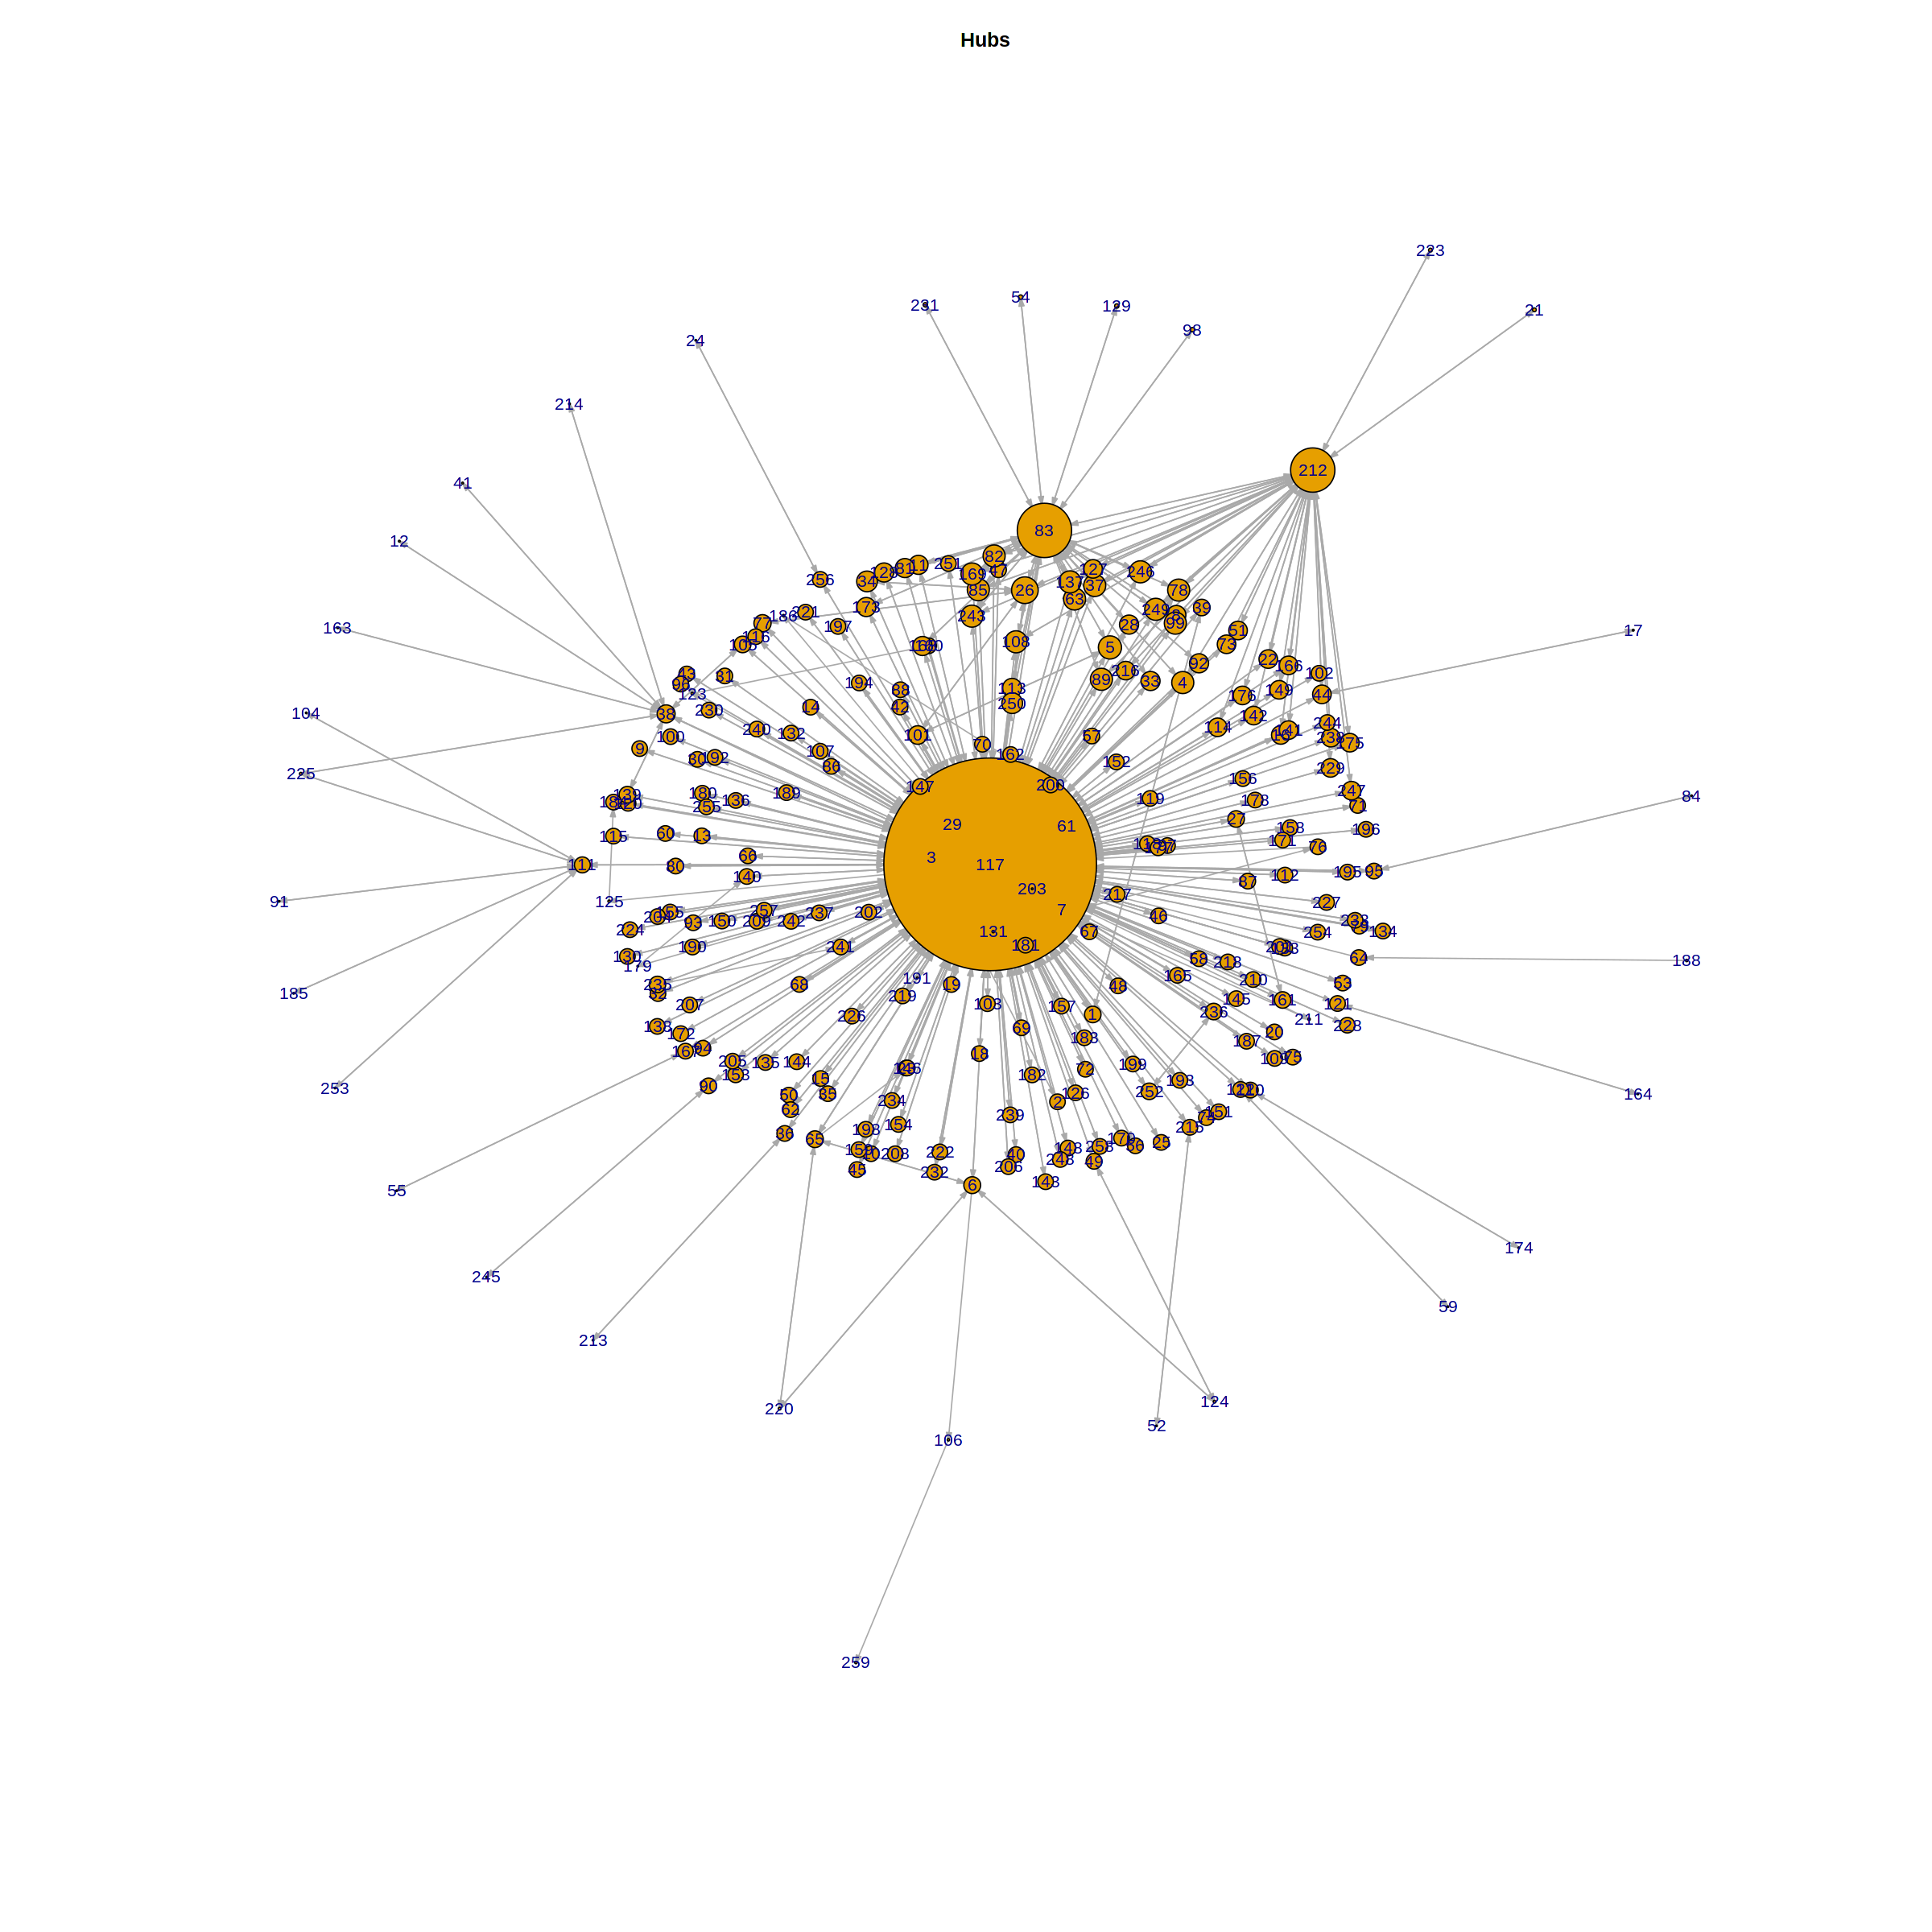

In [74]:
#The centeral, the node that have the more connections
set.seed(11)

hs <- hub_score(mynet)$vector
plot(mynet, vertex.size=hs * 30,main="Hubs",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

hs

### Authority

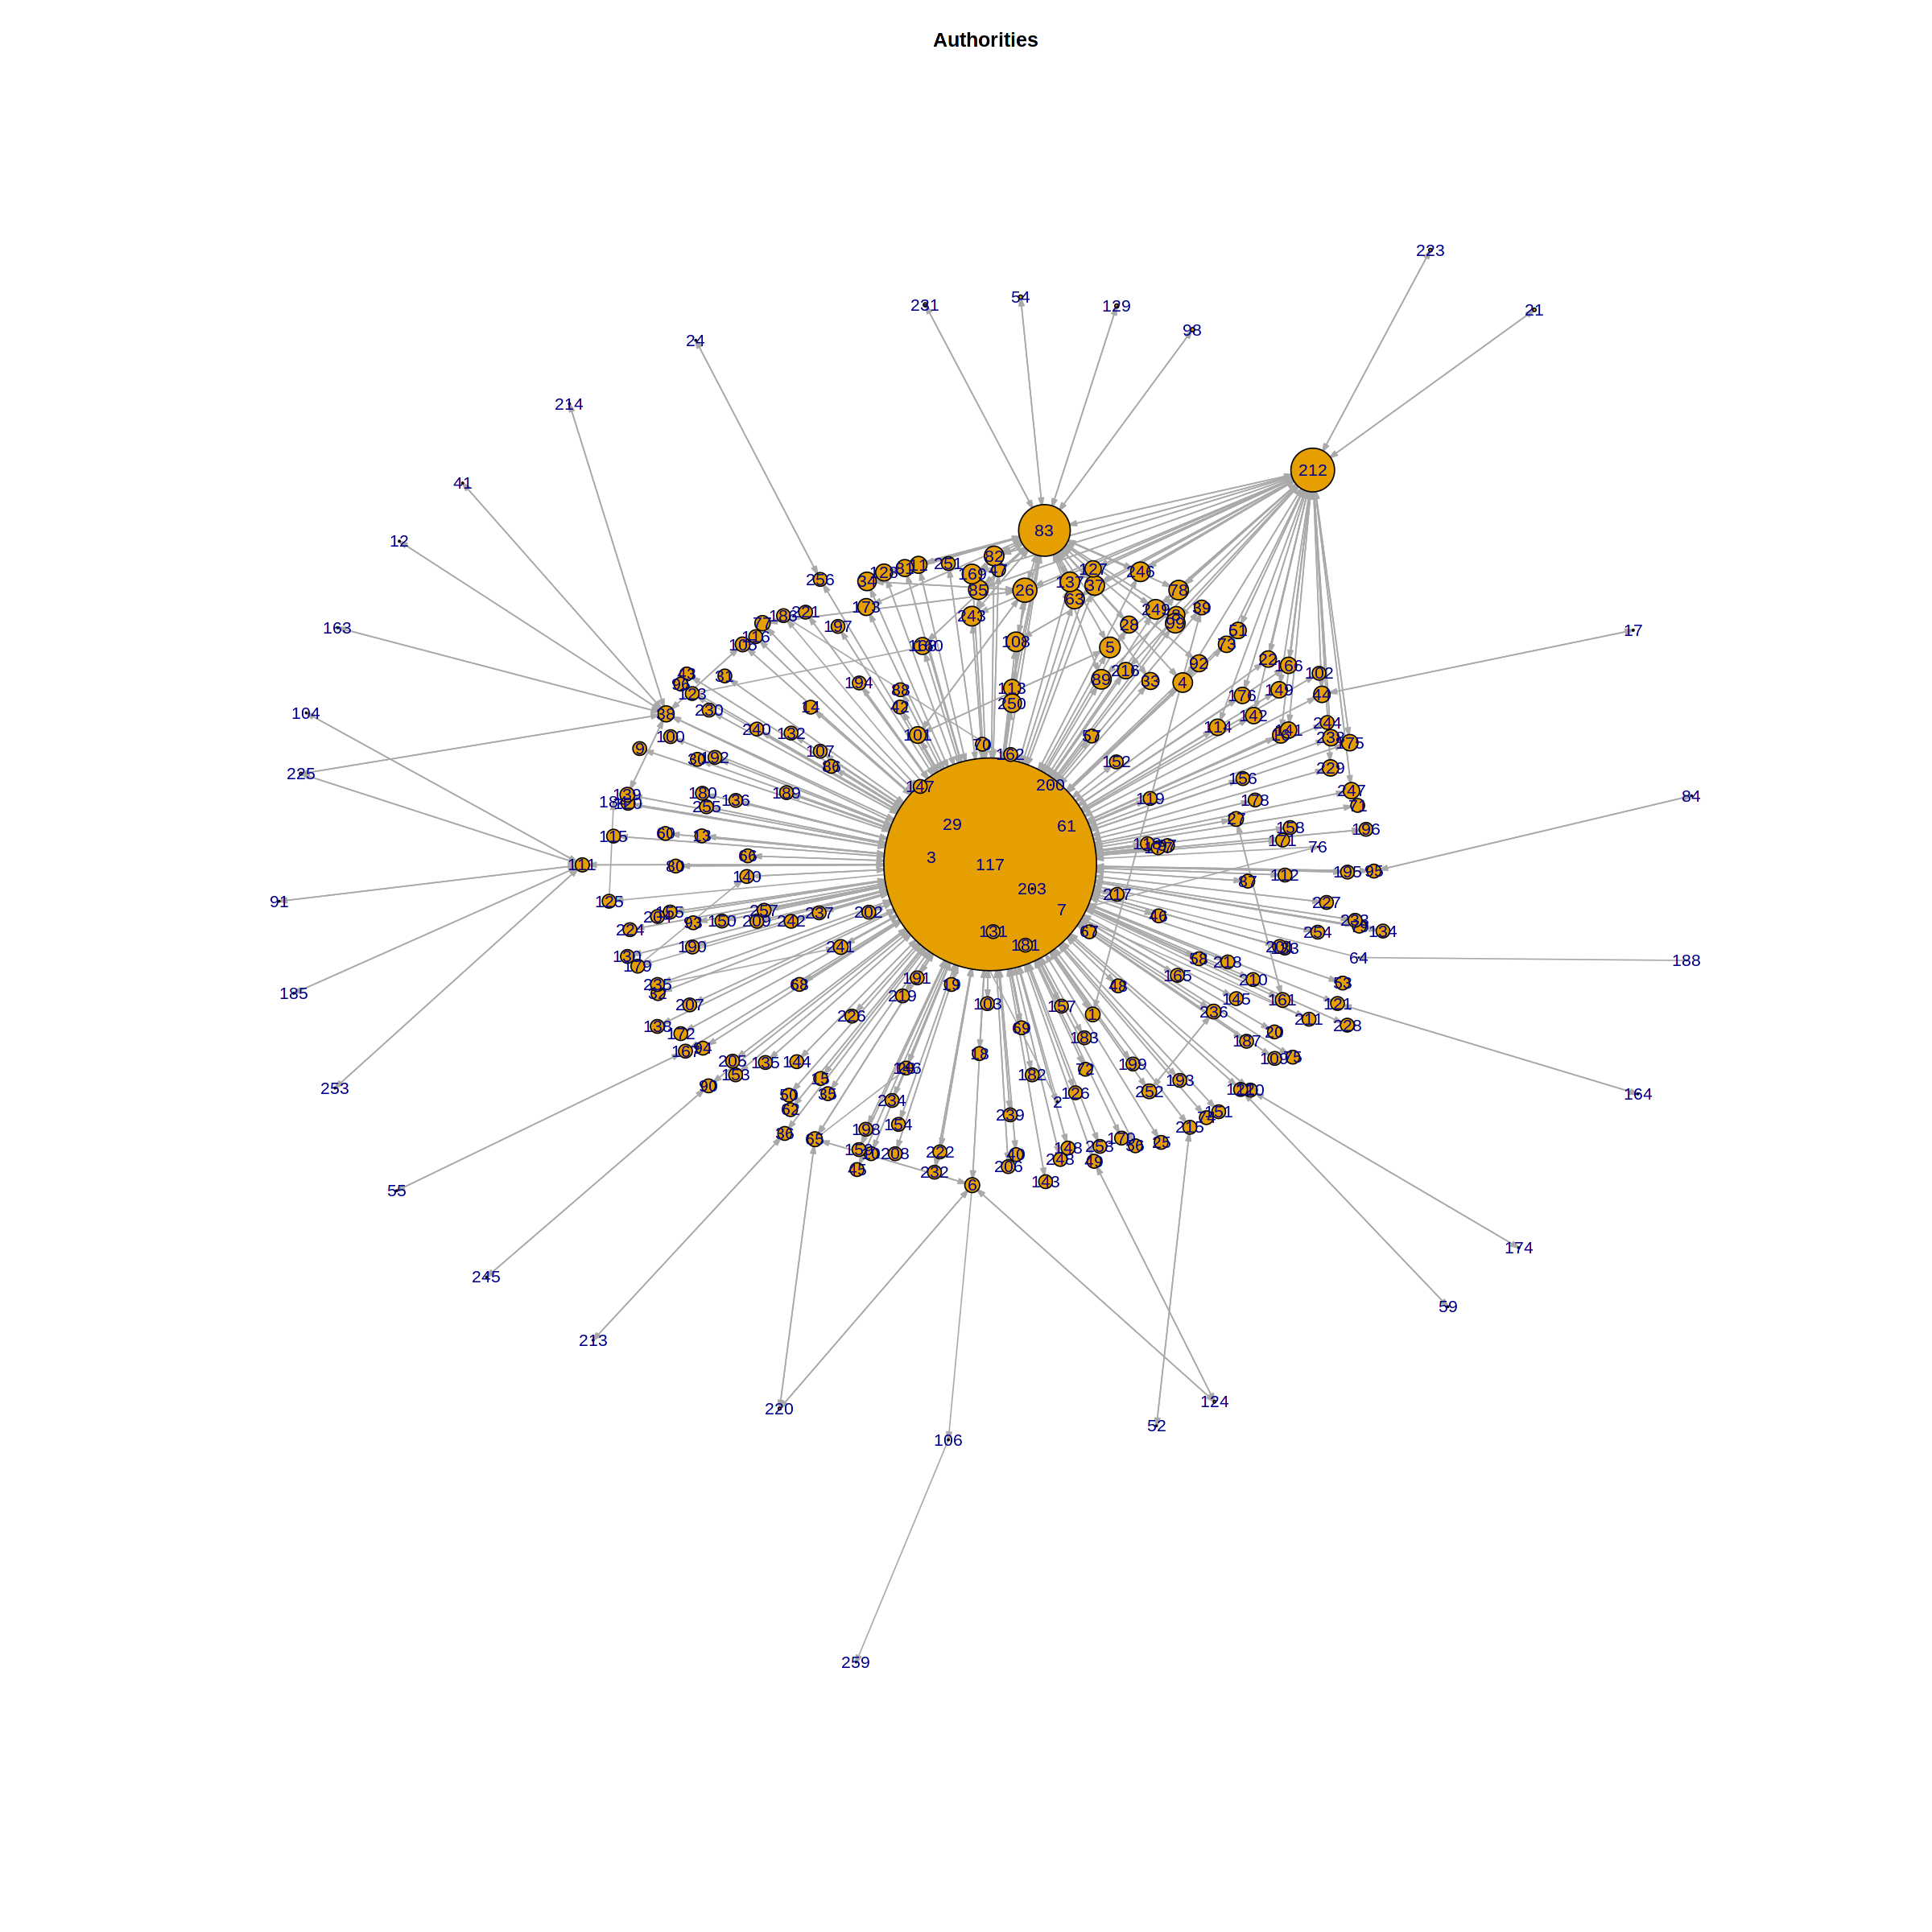

In [75]:
#the reference point, the node that conact places. gives the information for example of jornalist
set.seed(11)

au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 30,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

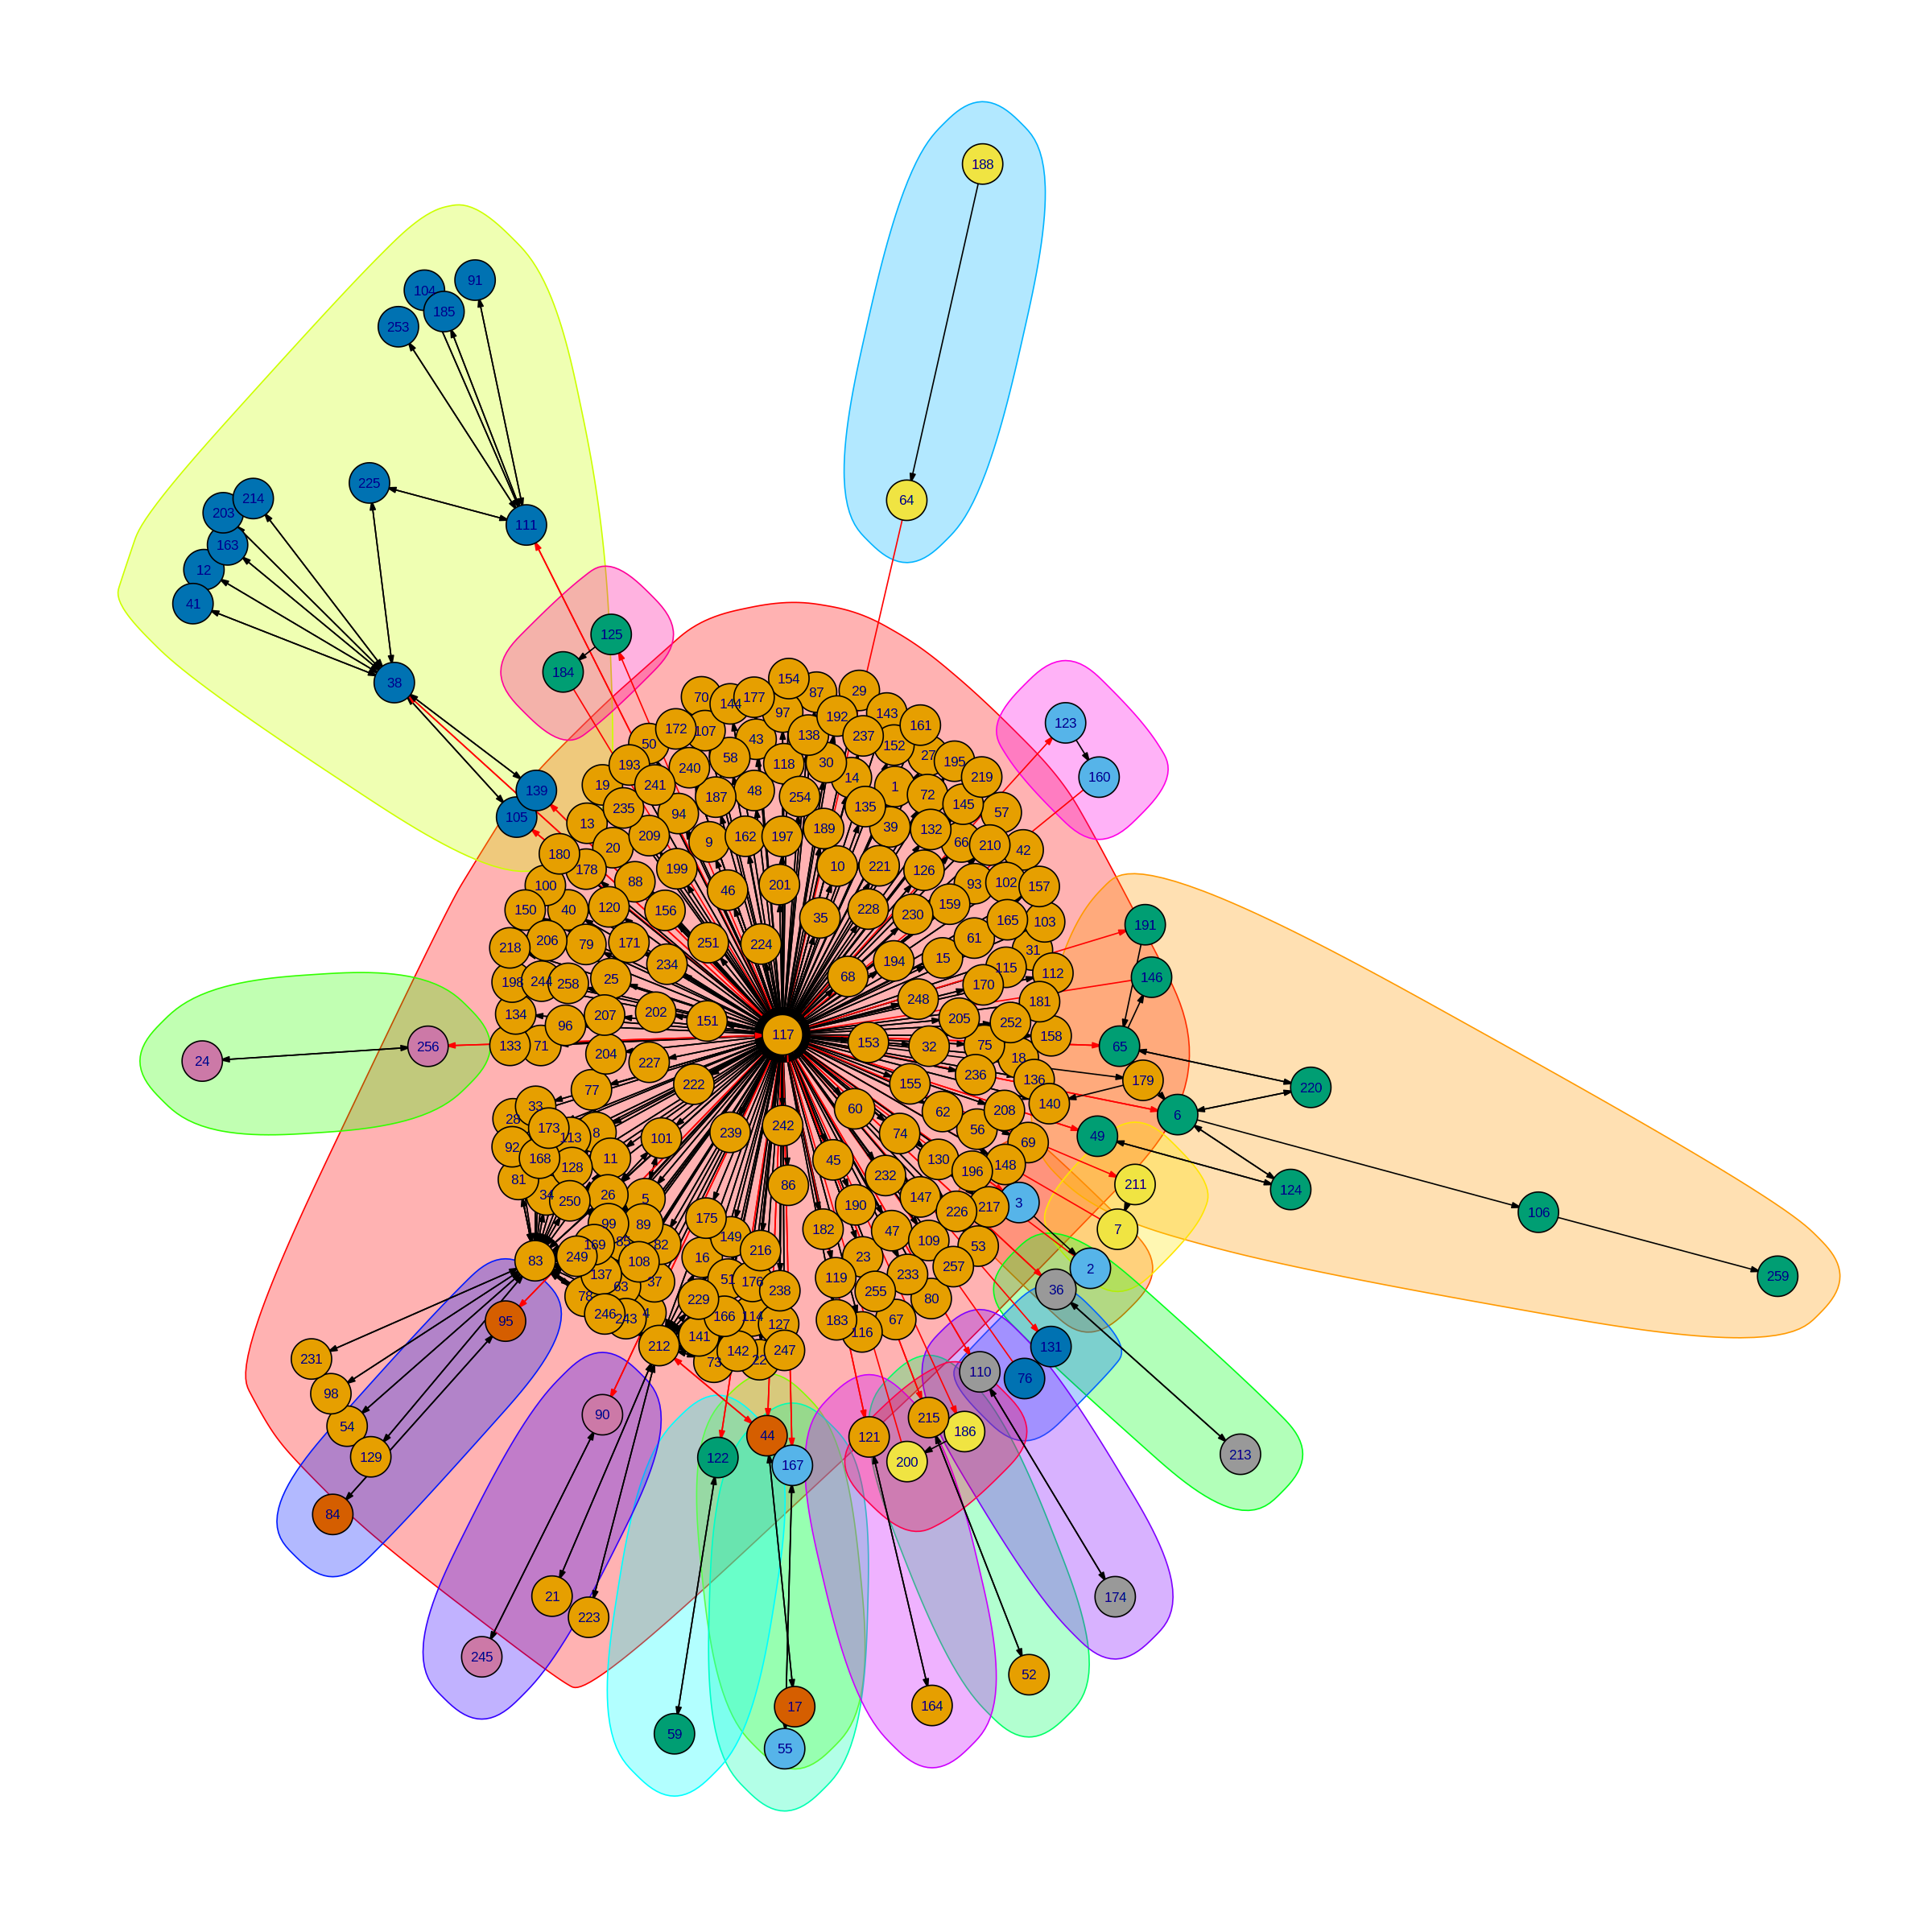

In [76]:
### community. looking for groups
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=5,edge.arrow.size=0.1, vertex.label.cex=0.8)

In [77]:
btwn <- cluster_edge_betweenness(mynet)
btwn

IGRAPH clustering edge betweenness, groups: 20, mod: 0.18
+ groups:
  $`1`
    [1]   1   4   5   8   9  10  11  13  14  15  16  18  19  20  21  22  23  25
   [19]  26  27  28  29  30  31  32  33  34  35  37  39  40  42  43  45  46  47
   [37]  48  50  51  53  54  56  57  58  60  61  62  63  66  67  68  69  70  71
   [55]  72  73  74  75  77  78  79  80  81  82  83  85  86  87  88  89  92  93
   [73]  94  96  97  98  99 100 101 102 103 107 108 109 112 113 114 115 116 117
   [91] 118 119 120 126 127 128 129 130 132 133 134 135 136 137 138 140 141 142
  [109] 143 144 145 147 148 149 150 151 152 153 154 155 156 157 158 159 161 162
  [127] 165 166 168 169 170 171 172 173 175 176 177 178 179 180 181 182 183 187
  [145] 189 190 192 193 194 195 196 197 198 199 201 202 204 205 206 207 208 209
  + ... omitted several groups/vertices

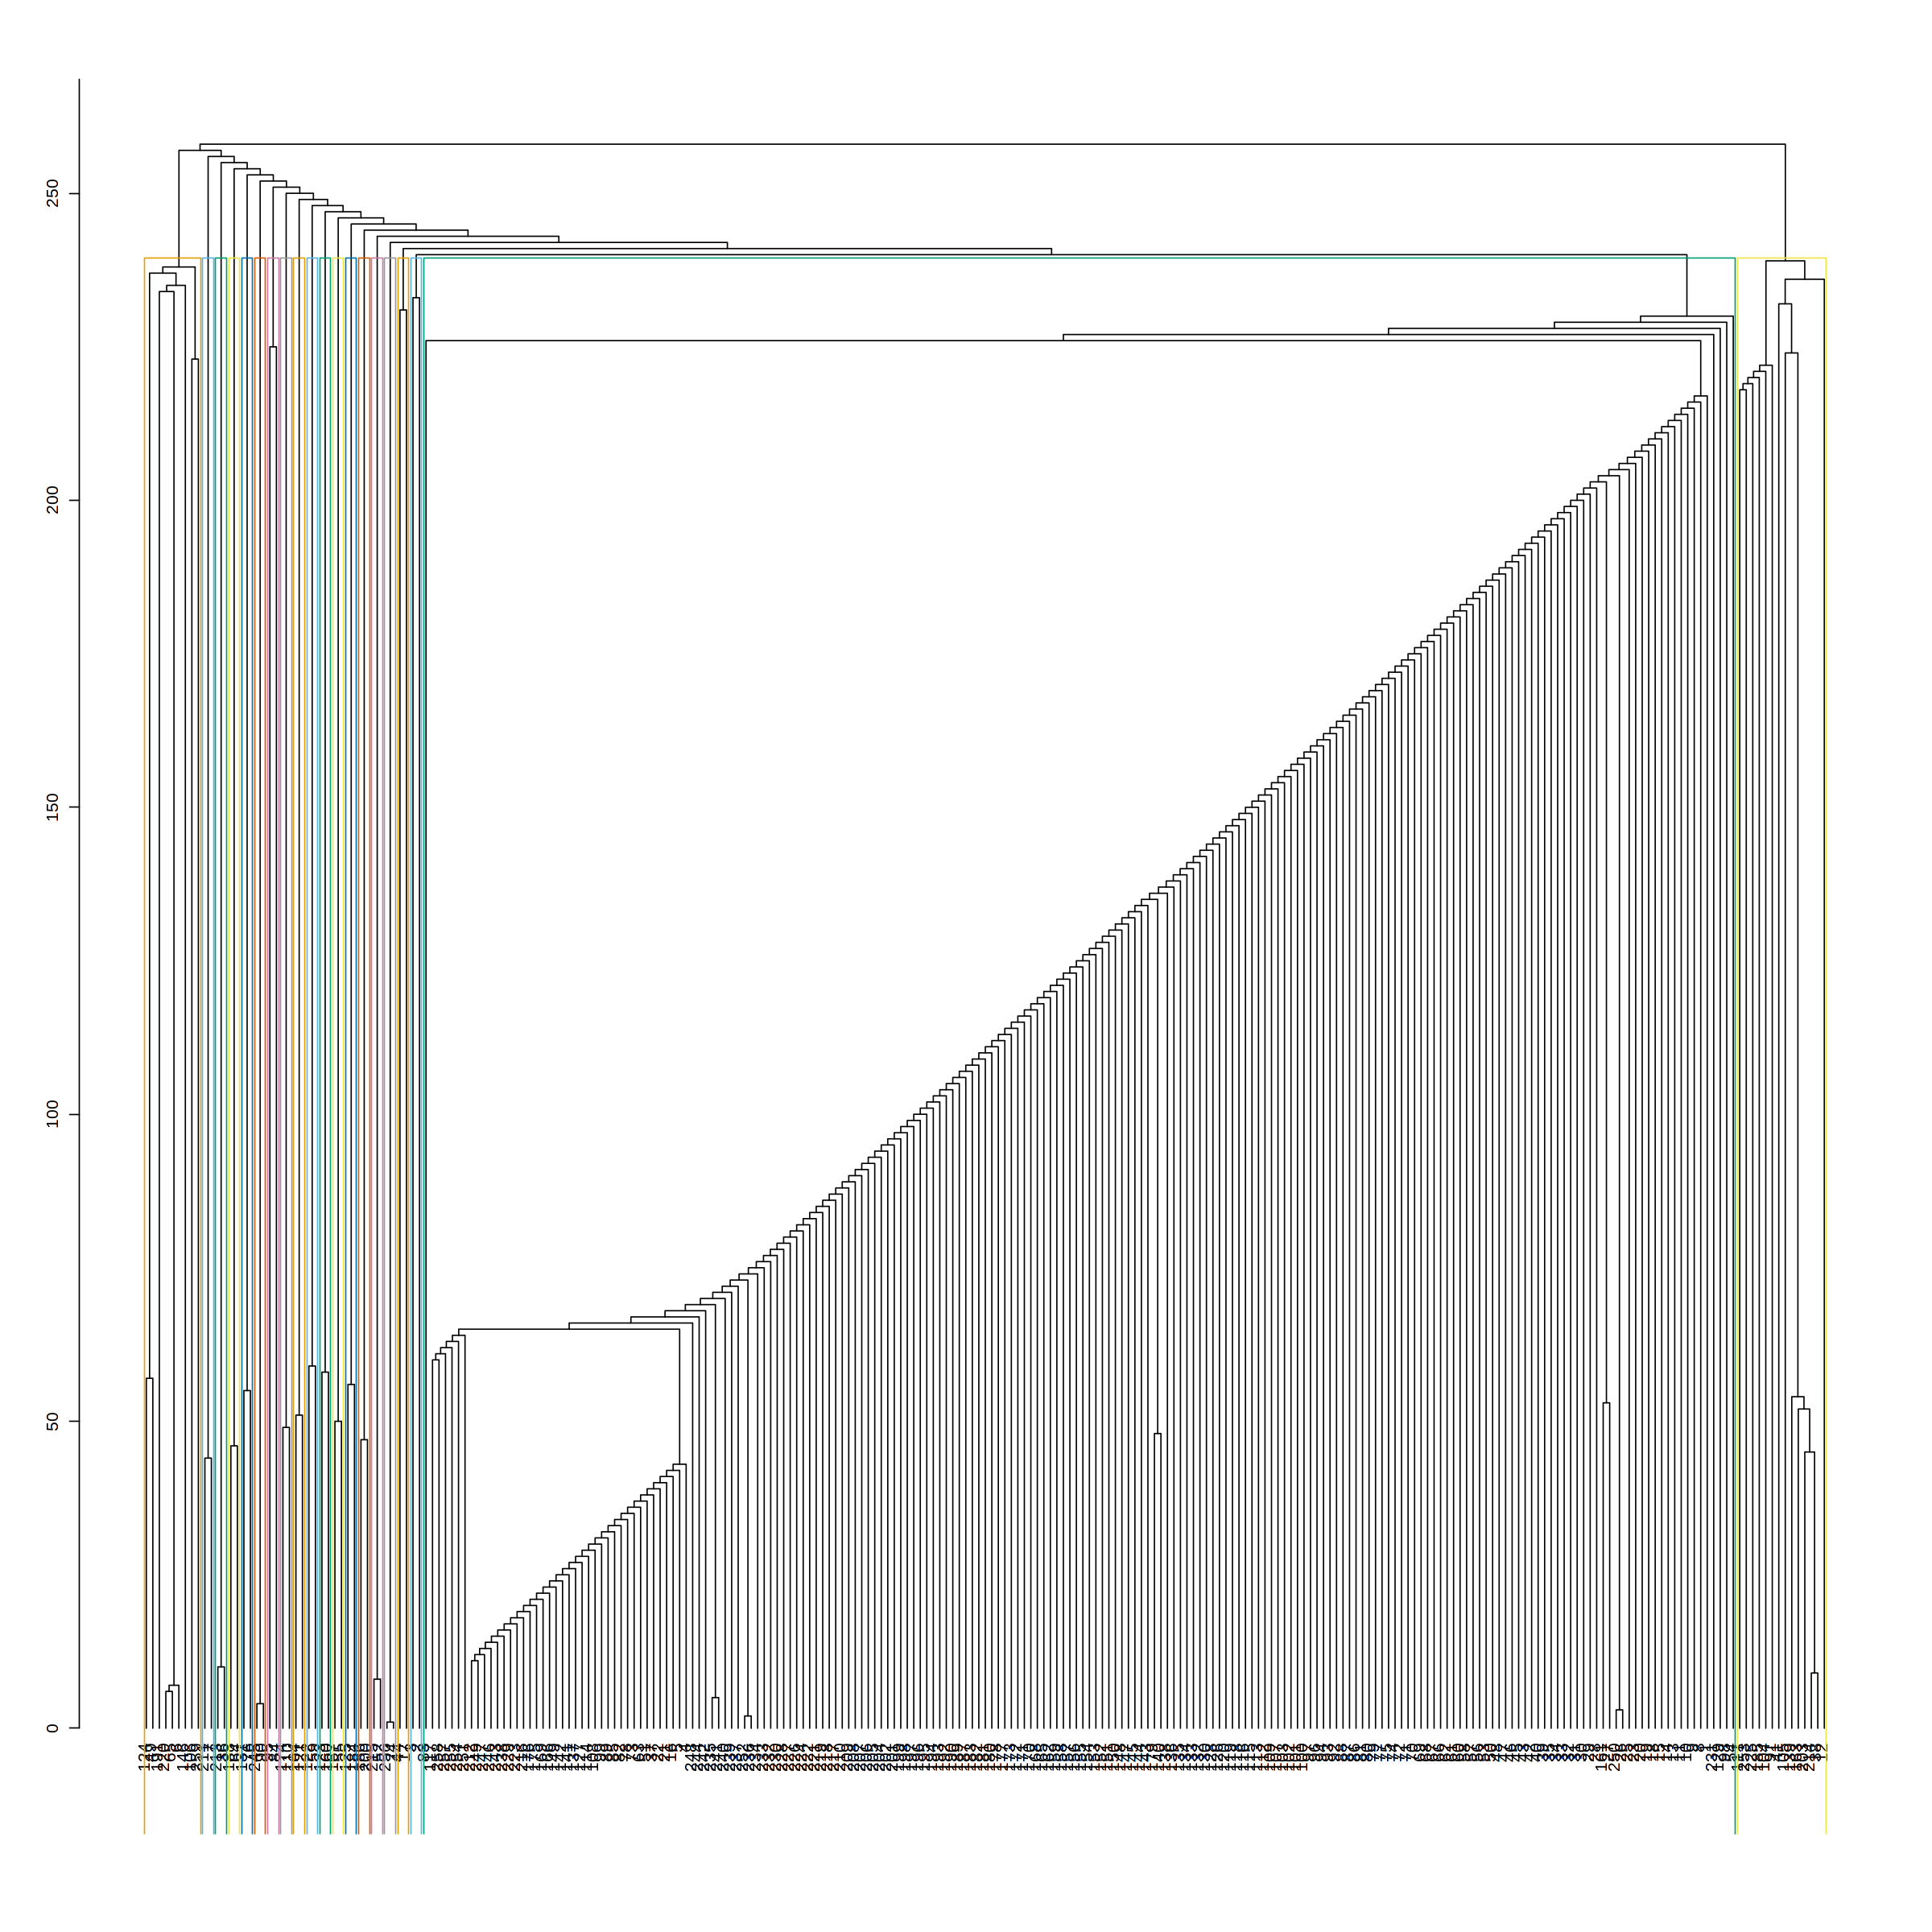

In [78]:
dendPlot(btwn, mode="hclust")

In [81]:
length(btwn)# it is 2 because we have only 2 groups

[1] 20

In [82]:
# this is what we need to our data base. this is the bottom line, and we add it to the database by joining
membership(btwn)

  [1]  1  2  2  1  1  3  4  1  1  1  1  5  1  1  1  1  6  1  1  1  1  1  1  7  1
 [26]  1  1  1  1  1  1  1  1  1  1  8  1  5  1  1  5  1  1  6  1  1  1  1  3  1
 [51]  1  9  1  1 10  1  1  1 11  1  1  1  1 12  3  1  1  1  1  1  1  1  1  1  1
 [76] 13  1  1  1  1  1  1  1 14  1  1  1  1  1 15  5  1  1  1 14  1  1  1  1  1
[101]  1  1  1  5  5  3  1  1  1 16  5  1  1  1  1  1  1  1  1  1 17 11 18  3 19
[126]  1  1  1  1  1 13  1  1  1  1  1  1  1  5  1  1  1  1  1  1  3  1  1  1  1
[151]  1  1  1  1  1  1  1  1  1 18  1  1  5 17  1  1 10  1  1  1  1  1  1 16  1
[176]  1  1  1  1  1  1  1  1 19  5 20  1 12  1  1  3  1  1  1  1  1  1  1  1 20
[201]  1  1  5  1  1  1  1  1  1  1  4  1  8  5  9  1  1  1  1  3  1  1  1  1  5
[226]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 15  1  1  1  1  1
[251]  1  1  5  1  1  7  1  1  3